In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
%pylab inline
df = pd.read_csv("./RedditShortDemoSurvey-1-Cleaned.csv")

Populating the interactive namespace from numpy and matplotlib


In [22]:
df

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


Dropping Unwanted columns

In [23]:
df.drop(["Unnamed: 19", "Unnamed: 18", "Unnamed: 17", "Unnamed: 16", "Unnamed: 15", "Unnamed: 14","Entry Id"], axis=1, inplace=True)

Creating a function that returns a continent when country is given

In [ ]:
def continent(x):
    if x == "Afghanistan", "Bahrain", "Bangladesh", "Brunei", "Cambodia", "China'", "Cyprus", "Hong Kong", "India", "Indonesia",
    "Iran", "Iraq,Kurdistan" , "Israel","Japan","Jordan","South Korea", "Kuwait", "Lebanon","Malaysia","Maldives", "Nepal", "Pakistan", "Palestine", 
    "Philipines","Qatar", "Saudi Arabia","Singapore", "Sri Lanka", "Taiwan","Tajikistan", "Thailand", "Turkey" , "United Arab Emirates","Vietnam":
        return "Asia"
    elif x == "France", "Germany", "Netharlands", "United Kingdom", "Romania", "Belgium", "Italy", "switzerland", "sweden", "Finland":
        return "Europe"
    elif x == "United States", "Canada", "Mexico", "Nicaragua", "El Salvador", "Dominican Republic", "Belize","Costa Rica", "Haiti", "Jamaica", "Panama",
    "Trinidad & Tobago", "St.Vincent", "Barbados", "Antigua and Barbuda"
    return "NorthAmerica"
    elif x == "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
    return "SouthAmerica"
    elif x == "Algeria","Cameroon","Egypt","Guinea-Bissau","Kenya","Mauritius", "Morocco", "Nigeria","South Africa","Tanzania","Togo","Tunisia","Uganda",
    "Zambia","Zimbabwe"
    return "Africa"
    elif x == "Australia","New Zeland","Papua new Guinea", "Fiji","Republic of the Marshall Islands"
    return "Australia&ocenia"
    else:
        return "None"
    
df["Treated country data"] = df["Treated country data"].apply(continent)

Cleaning values

In [24]:
df["gender"] = df["Please indicate your gender."]
df["age_bucket"] = df["Please select the category that includes your age."]
df["marital"] = df["What is your marital status?"]
df["employment"] = df["What best describes your employment status?"]
df["military"] = df["Are you or have you ever been in military service?"]
df["children"] = df["Do you currently have children under the age of 18 living in your household?"]
df["education"] = df["What best describes your level of education?"]
df["country_data"] = df["Treated country data"]
df["state"] = df["(For U. S. redditors) In which state do you live?"]
df["income_bucket"] = df["Which one of the following ranges includes your total yearly household income before taxes?"]
df["subreddit_data"] = df["treated subreddit data"]
df["dog_or_cat"] = df["Are you a dog or a cat person?"]
df["cheese"] = df["If you were a cheese, what cheese would you be?"]

In [25]:
df.drop(["Please indicate your gender.",
         "Please select the category that includes your age.",
         "What is your marital status?",
         "What best describes your employment status?",
         "Are you or have you ever been in military service?",
         "Do you currently have children under the age of 18 living in your household?",
         "What best describes your level of education?",
         "Treated country data",
         "(For U. S. redditors) In which state do you live?",
         "Which one of the following ranges includes your total yearly household income before taxes?",
         "treated subreddit data",
         "Are you a dog or a cat person?",
         "If you were a cheese, what cheese would you be?"], axis=1, inplace=True)

In [26]:
df.columns

Index([u'gender', u'age_bucket', u'marital', u'employment', u'military',
       u'children', u'education', u'country_data', u'state', u'income_bucket',
       u'subreddit_data', u'dog_or_cat', u'cheese'],
      dtype='object')

In [27]:
df.describe()

,gender,age_bucket,marital,employment,military,children,education,country_data,state,income_bucket,subreddit_data,dog_or_cat,cheese
count,32754,32754,32754,32754,32754,32754,32754,32754,20846,32754,28419,32752,32754
unique,3,8,7,7,3,3,8,440,52,9,1833,7,17
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,California,"Under $20,000",askreddit,I like dogs.,Other
freq,26418,15802,10428,14814,30526,27488,11046,20967,3401,7892,2123,17149,6562


In [28]:
columns = ['gender', 'age_bucket', 'marital', 'employment', 'military', 'children', 'education', 'income_bucket', 'cheese']

for column in columns:
    print column, df[column].unique()

gender ['Male' 'Female' 'None']
age_bucket ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
marital ['Blank' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Single' 'Engaged' 'Widowed']
employment ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
military ['none' 'No' 'Yes']
children ['No' 'Yes' 'None']
education ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
income_bucket ['$150,000 or more' 'Under $20,000' '$70,000 - $99,999' 'none'
 '$40,000 - $49,999' '$50,000 - $69,999' '$100,000 - $149,999'
 '$20,000 - $29,999' '$30,000 - $39,999']
cheese ['none' 'Cheddar' 'American' 'Provolone' 'Munster' 'Swiss' 'Goat' 'Feta'
 'Other' 'Brie' 'Paneer' 'Limburger' '1' ' awww' ' f7u12' "programming')"
 ' Pics']


In [29]:
df.drop("state", axis=1, inplace=True)

In [30]:
def clean_gender(x):
    if x == "Male":
        return "m"
    elif x == "Female":
        return "f"
    else:
        return "None"
    
df["gender"] = df["gender"].apply(clean_gender)

In [31]:
def clean_military(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    else:
        return "None"
    
df["military"] = df["military"].apply(clean_military)

In [32]:
def clean_children(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    else:
        return "None"
    
df["children"] = df["children"].apply(clean_children)

In [33]:
def clean_dog_cat_column(x):
    if x == "I like cats.":
        return "c"
    elif x == "I like dogs.":
        return "d"
    else:
        return "None"
    
df["dog_or_cat"] = df["dog_or_cat"].apply(clean_dog_cat_column)

In [34]:
def clean_cheese(x):
    if x == "none":
        return "None"
    elif x == " awww":
        return "None"
    elif x == " f7u12":
         return "None"   
    elif x == "programming":
        return "None"
    elif x == "1":
        return "None"
    elif x == " Pics":
        return "None"
    else:
        return x
df["cheese"] = df["cheese"].apply(clean_cheese)

In [35]:
columns = ['gender', 'age_bucket', 'marital', 'employment', 'military', 'children', 'education', 'income_bucket', 'cheese']

for column in columns:
    print column, df[column].unique()

gender ['m' 'f' 'None']
age_bucket ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
marital ['Blank' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Single' 'Engaged' 'Widowed']
employment ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
military ['None' 0 1]
children [0 1 'None']
education ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
income_bucket ['$150,000 or more' 'Under $20,000' '$70,000 - $99,999' 'none'
 '$40,000 - $49,999' '$50,000 - $69,999' '$100,000 - $149,999'
 '$20,000 - $29,999' '$30,000 - $39,999']
cheese ['None' 'Cheddar' 'American' 'Provolone' 'Munster' 'Swiss' 'Goat' 'Feta'
 'Other' 'Brie' 'Paneer' 'Limburger' "programming')"]


In [36]:
df.columns

Index([u'gender', u'age_bucket', u'marital', u'employment', u'military',
       u'children', u'education', u'country_data', u'income_bucket',
       u'subreddit_data', u'dog_or_cat', u'cheese'],
      dtype='object')

In [37]:
def describe_categorical(df):
    from IPython.display import display, HTML
    display(HTML(df[df.columns[df.dtypes == "object"]].describe().to_html()))
    
describe_categorical(df)

,gender,age_bucket,marital,employment,military,children,education,country_data,income_bucket,subreddit_data,dog_or_cat,cheese
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,28419,32754,32754
unique,3,8,7,7,3,3,8,440,9,1833,3,13
top,m,18-24,Single,Employed full time,0,0,Bachelor's degree,United States,"Under $20,000",askreddit,d,Other
freq,26418,15802,10428,14814,30526,27488,11046,20967,7892,2123,17149,6562


Copying Data Frame(df) to X

In [38]:
X = df.copy()
X_no_country = X.copy()
X_no_country.drop("country_data", axis=1, inplace=True)

X_no_country_no_reddit = X_no_country.copy()
X_no_country_no_reddit.drop("subreddit_data", axis=1, inplace=True)
X_no_country_no_reddit.columns

Index([u'gender', u'age_bucket', u'marital', u'employment', u'military',
       u'children', u'education', u'income_bucket', u'dog_or_cat', u'cheese'],
      dtype='object')

Obtaining Dummy Values

In [39]:
categorical_variables = X.columns

for variable in categorical_variables:
    X[variable].fillna("Blank", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [40]:
X

,gender_None,gender_f,gender_m,age_bucket_18-24,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65 or Above,age_bucket_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
categorical_variables = X_no_country_no_reddit.columns

for variable in categorical_variables:
    X_no_country_no_reddit[variable].fillna("Blank", inplace=True)
    dummies = pd.get_dummies(X_no_country_no_reddit[variable], prefix=variable)
    X_no_country_no_reddit = pd.concat([X_no_country_no_reddit, dummies], axis=1)
    X_no_country_no_reddit.drop([variable], axis=1, inplace=True)

In [42]:
X_no_country_no_reddit

,gender_None,gender_f,gender_m,age_bucket_18-24,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65 or Above,age_bucket_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


EDA

In [43]:
X_for_eda = df.copy()
X_for_eda.drop(["country_data", "subreddit_data"], axis=1, inplace=True)
X_for_eda.columns

Index([u'gender', u'age_bucket', u'marital', u'employment', u'military',
       u'children', u'education', u'income_bucket', u'dog_or_cat', u'cheese'],
      dtype='object')

In [44]:
columns = X_for_eda.columns

for column in columns:
    print column
    print df[column].value_counts()
    print

gender
m       26418
f        6135
None      201
Name: gender, dtype: int64

age_bucket
18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: age_bucket, dtype: int64

marital
Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: marital, dtype: int64

employment
Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                         

printing Graphs

gender


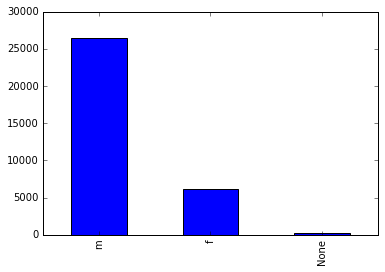


age_bucket


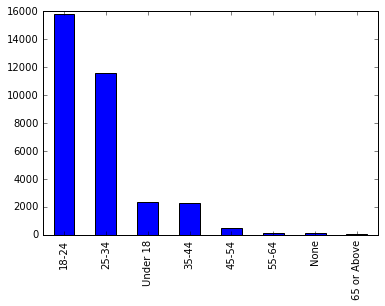


marital


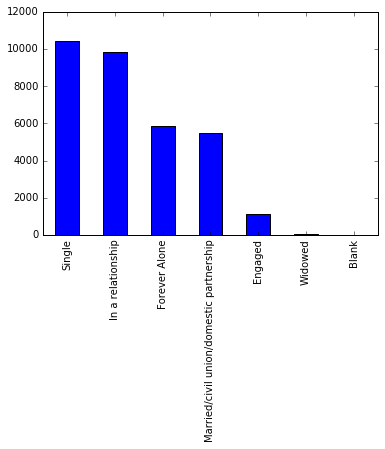


employment


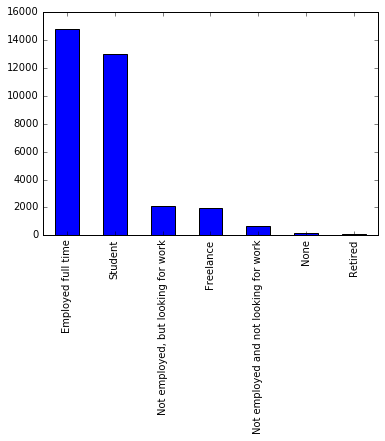


military


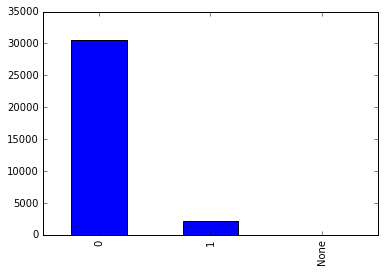


children


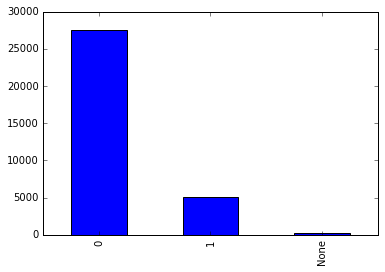


education


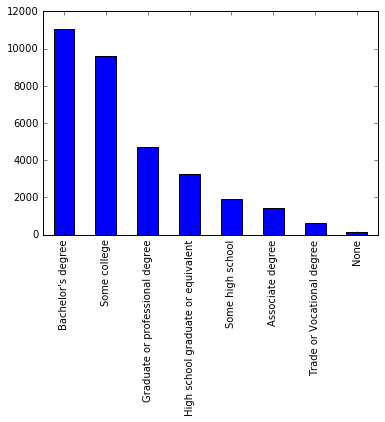


income_bucket


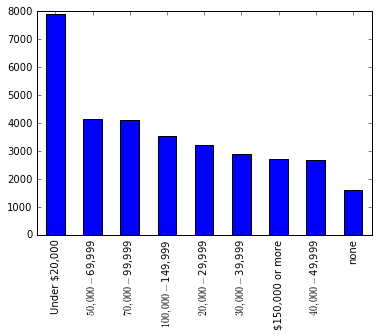


dog_or_cat


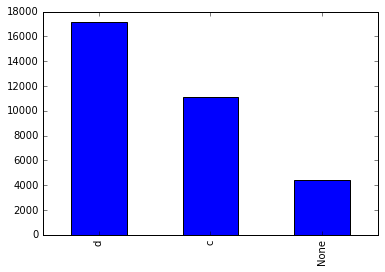


cheese


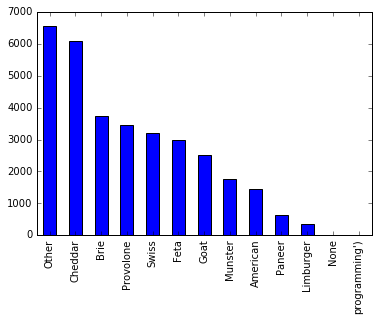

In [45]:
columns = X_for_eda.columns

for column in columns:
    print column
    df[column].value_counts().plot(kind='bar')
    show()
    print

Using Pearson's Correlation Coefficient and Plotting a diagonal correlation matrix
source: http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
X2 = X_no_country_no_reddit.copy()
X2.describe()

,gender_None,gender_f,gender_m,age_bucket_18-24,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65 or Above,age_bucket_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
count,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,...,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000
mean,0.006137,0.187305,0.806558,0.482445,0.353392,0.068908,0.015326,0.004274,0.001832,0.002687,...,0.091317,0.076815,0.010289,0.054039,0.000305,0.200342,0.018868,0.105453,0.098125,0.000031
std,0.078097,0.390162,0.395002,0.499699,0.478030,0.253301,0.122849,0.065239,0.042761,0.051764,...,0.288064,0.266302,0.100912,0.226098,0.017471,0.400262,0.136061,0.307141,0.297489,0.005525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
sns.set(style="white")

In [49]:
d = pd.DataFrame(data=X2,
                 columns=X2.columns)

In [50]:
corr = d.corr()
corr

,gender_None,gender_f,gender_m,age_bucket_18-24,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65 or Above,age_bucket_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
gender_None,1.000000,-0.037724,-0.160452,-0.035184,0.002427,-0.001313,-0.003439,-0.005148,0.014919,0.381091,...,0.003590,-0.009454,-0.004138,0.033091,-0.001373,-0.000262,0.000596,-0.011705,0.000364,-0.000434
gender_f,-0.037724,1.000000,-0.980288,0.047638,-0.032750,-0.027108,0.009537,0.010528,0.017864,-0.008289,...,0.047477,0.083378,-0.023358,-0.010913,0.009527,-0.043812,0.017970,-0.022154,-0.038142,-0.002653
gender_m,-0.160452,-0.980288,1.000000,-0.040098,0.031868,0.027036,-0.008741,-0.009381,-0.020595,-0.067160,...,-0.047605,-0.080487,0.023890,0.004236,-0.009139,0.043327,-0.017868,0.024197,0.037602,0.002706
age_bucket_18-24,-0.035184,0.047638,-0.040098,1.000000,-0.713762,-0.262653,-0.120453,-0.063257,-0.041361,-0.050112,...,0.004880,-0.025429,-0.014279,-0.001602,-0.002883,-0.012640,-0.020725,0.000922,0.024322,-0.005335
age_bucket_25-34,0.002427,-0.032750,0.031868,-0.713762,1.000000,-0.201115,-0.092232,-0.048436,-0.031670,-0.038371,...,0.011309,0.031627,-0.000059,-0.004662,0.005360,0.000326,0.032204,0.012349,-0.031518,0.007474
age_bucket_35-44,-0.001313,-0.027108,0.027036,-0.262653,-0.201115,1.000000,-0.033940,-0.017824,-0.011654,-0.014120,...,-0.008830,0.015674,0.003318,-0.012777,0.002145,0.021630,-0.001404,-0.017270,-0.009914,-0.001503
age_bucket_45-54,-0.003439,0.009537,-0.008741,-0.120453,-0.092232,-0.033940,1.000000,-0.008174,-0.005345,-0.006475,...,-0.009353,-0.002390,0.006982,-0.005636,-0.002180,0.005854,-0.008168,-0.006423,0.013986,-0.000689
age_bucket_55-64,-0.005148,0.010528,-0.009381,-0.063257,-0.048436,-0.017824,-0.008174,1.000000,-0.002807,-0.003401,...,-0.002899,0.003947,0.011870,-0.005310,-0.001145,0.001113,-0.009086,-0.002687,-0.002733,-0.000362
age_bucket_65 or Above,0.014919,0.017864,-0.020595,-0.041361,-0.031670,-0.011654,-0.005345,-0.002807,1.000000,-0.002223,...,-0.001187,0.009092,0.009783,0.002393,-0.000749,-0.000037,-0.005941,-0.005410,0.002670,-0.000237
age_bucket_None,0.381091,-0.008289,-0.067160,-0.050112,-0.038371,-0.014120,-0.006475,-0.003401,-0.002223,1.000000,...,0.001974,-0.010542,0.000553,0.063246,-0.000907,-0.008296,-0.002863,-0.008219,-0.007207,-0.000287


In [51]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

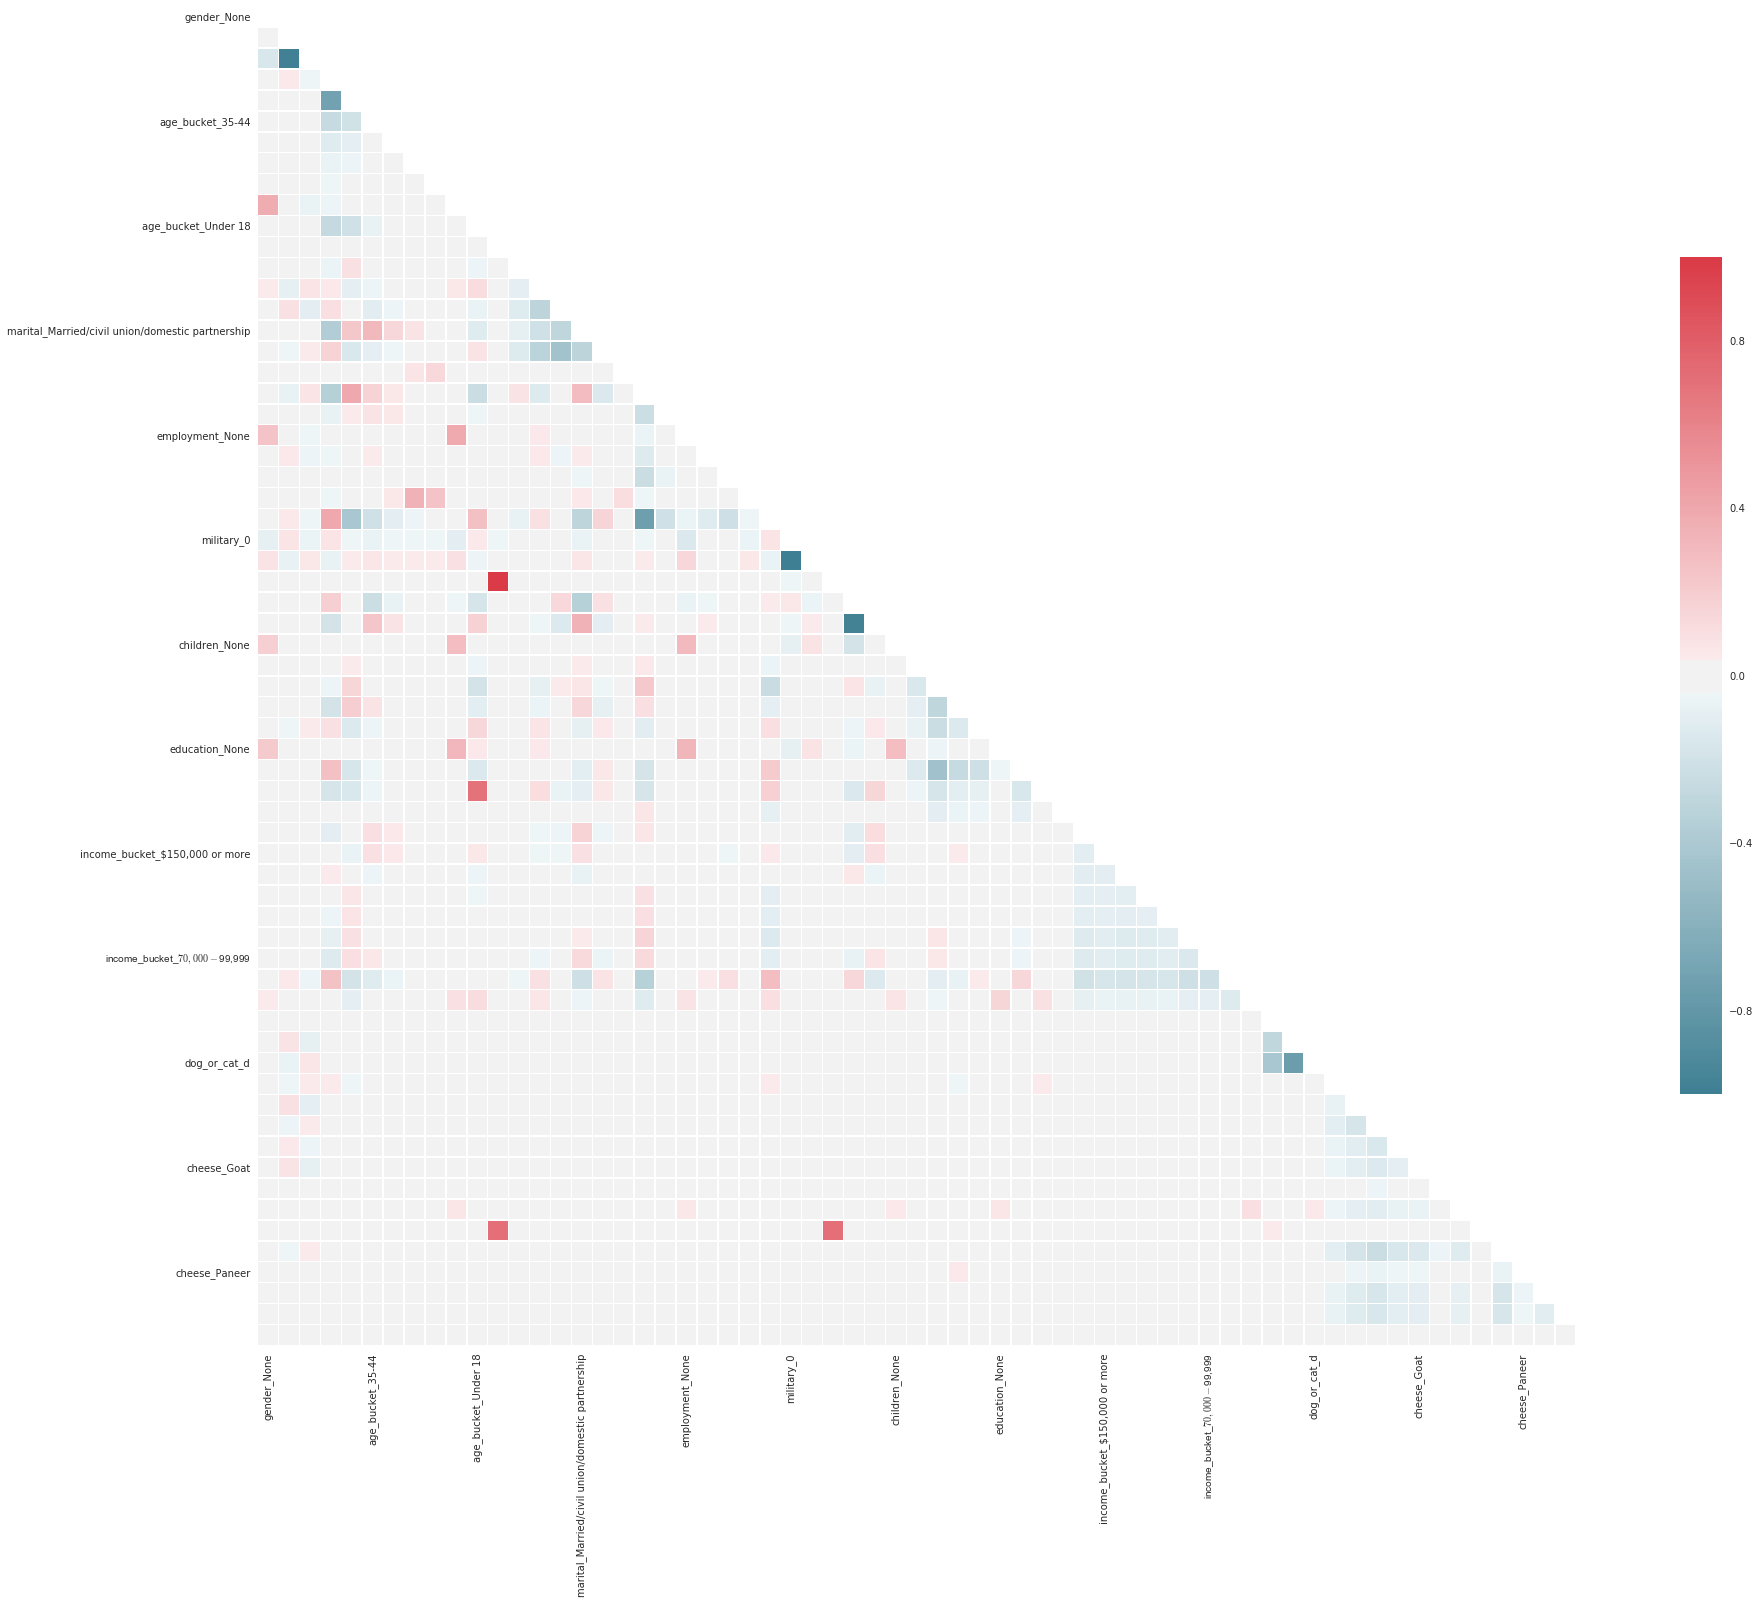

In [52]:
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [53]:
corr.stack().sort_values()

military_0                                        military_1                                         -0.998795
military_1                                        military_0                                         -0.998795
gender_f                                          gender_m                                           -0.980288
gender_m                                          gender_f                                           -0.980288
children_1                                        children_0                                         -0.975109
children_0                                        children_1                                         -0.975109
dog_or_cat_c                                      dog_or_cat_d                                       -0.753211
dog_or_cat_d                                      dog_or_cat_c                                       -0.753211
employment_Student                                employment_Employed full time                      -0.736561
e

In [54]:
X_for_forest = df.copy()
X_for_forest.drop(["country_data", "subreddit_data"], axis=1, inplace=True)
X_for_forest.columns

Index([u'gender', u'age_bucket', u'marital', u'employment', u'military',
       u'children', u'education', u'income_bucket', u'dog_or_cat', u'cheese'],
      dtype='object')

In [55]:
categorical_variables = X_for_forest.columns

for variable in categorical_variables:
    X_for_forest[variable].fillna("None", inplace=True)
    dummies = pd.get_dummies(X_for_forest[variable], prefix=variable)
    X_for_forest = pd.concat([X_for_forest, dummies], axis=1)
    X_for_forest.drop([variable], axis=1, inplace=True)

In [56]:
X_for_forest.drop(["military_1","military_None"], axis=1, inplace=True)
y = X_for_forest.pop("military_0")

In [57]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
printall(X_for_forest)

,gender_None,gender_f,gender_m,age_bucket_18-24,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65 or Above,age_bucket_None,age_bucket_Under 18,marital_Blank,marital_Engaged,marital_Forever Alone,marital_In a relationship,marital_Married/civil union/domestic partnership,marital_Single,marital_Widowed,employment_Employed full time,employment_Freelance,employment_None,employment_Not employed and not looking for work,"employment_Not employed, but looking for work",employment_Retired,employment_Student,children_0,children_1,children_None,education_Associate degree,education_Bachelor's degree,education_Graduate or professional degree,education_High school graduate or equivalent,education_None,education_Some college,education_Some high school,education_Trade or Vocational degree,"income_bucket_$100,000 - $149,999","income_bucket_$150,000 or more","income_bucket_$20,000 - $29,999","income_bucket_$30,000 - $39,999","income_bucket_$40,000 - $49,999","income_bucket_$50,000 - $69,999","income_bucket_$70,000 - $99,999","income_bucket_Under $20,000",income_bucket_none,dog_or_cat_None,dog_or_cat_c,dog_or_cat_d,cheese_American,cheese_Brie,cheese_Cheddar,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32749,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
32750,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32751,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32752,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
X_for_forest.columns

Index([u'gender_None', u'gender_f', u'gender_m', u'age_bucket_18-24',
       u'age_bucket_25-34', u'age_bucket_35-44', u'age_bucket_45-54',
       u'age_bucket_55-64', u'age_bucket_65 or Above', u'age_bucket_None',
       u'age_bucket_Under 18', u'marital_Blank', u'marital_Engaged',
       u'marital_Forever Alone', u'marital_In a relationship',
       u'marital_Married/civil union/domestic partnership', u'marital_Single',
       u'marital_Widowed', u'employment_Employed full time',
       u'employment_Freelance', u'employment_None',
       u'employment_Not employed and not looking for work',
       u'employment_Not employed, but looking for work', u'employment_Retired',
       u'employment_Student', u'children_0', u'children_1', u'children_None',
       u'education_Associate degree', u'education_Bachelor's degree',
       u'education_Graduate or professional degree',
       u'education_High school graduate or equivalent', u'education_None',
       u'education_Some college', u'education

In [59]:
y

0        0
1        0
2        0
3        0
4        0
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       0
24       1
25       1
26       1
27       1
28       1
29       1
        ..
32724    1
32725    1
32726    1
32727    1
32728    1
32729    1
32730    1
32731    1
32732    1
32733    1
32734    0
32735    1
32736    0
32737    0
32738    1
32739    1
32740    1
32741    0
32742    1
32743    1
32744    1
32745    1
32746    1
32747    1
32748    0
32749    1
32750    1
32751    1
32752    1
32753    1
Name: military_0, dtype: float64

In [60]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=60)
model.fit(X_for_forest, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.614988506134


In [61]:
model.feature_importances_

array([ 0.00288124,  0.00826428,  0.00430941,  0.00686897,  0.00964591,
        0.00783292,  0.0046636 ,  0.0029302 ,  0.00240898,  0.0014618 ,
        0.005302  ,  0.00232668,  0.01227643,  0.03042673,  0.03673124,
        0.02118936,  0.03739058,  0.00299565,  0.02537653,  0.01690578,
        0.02976938,  0.00854482,  0.01463755,  0.00517583,  0.01859024,
        0.0191314 ,  0.02157574,  0.00940632,  0.01324764,  0.01886316,
        0.01988779,  0.02050045,  0.00225838,  0.02931837,  0.0080735 ,
        0.00854286,  0.02421652,  0.02004729,  0.02163641,  0.02075714,
        0.02056397,  0.02729534,  0.02630274,  0.02525633,  0.01240987,
        0.0302266 ,  0.03931773,  0.04533509,  0.01188297,  0.02048976,
        0.02875357,  0.01950821,  0.01649384,  0.00409438,  0.01470603,
        0.00064405,  0.03067395,  0.00405992,  0.02304689,  0.02256967,  0.        ])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


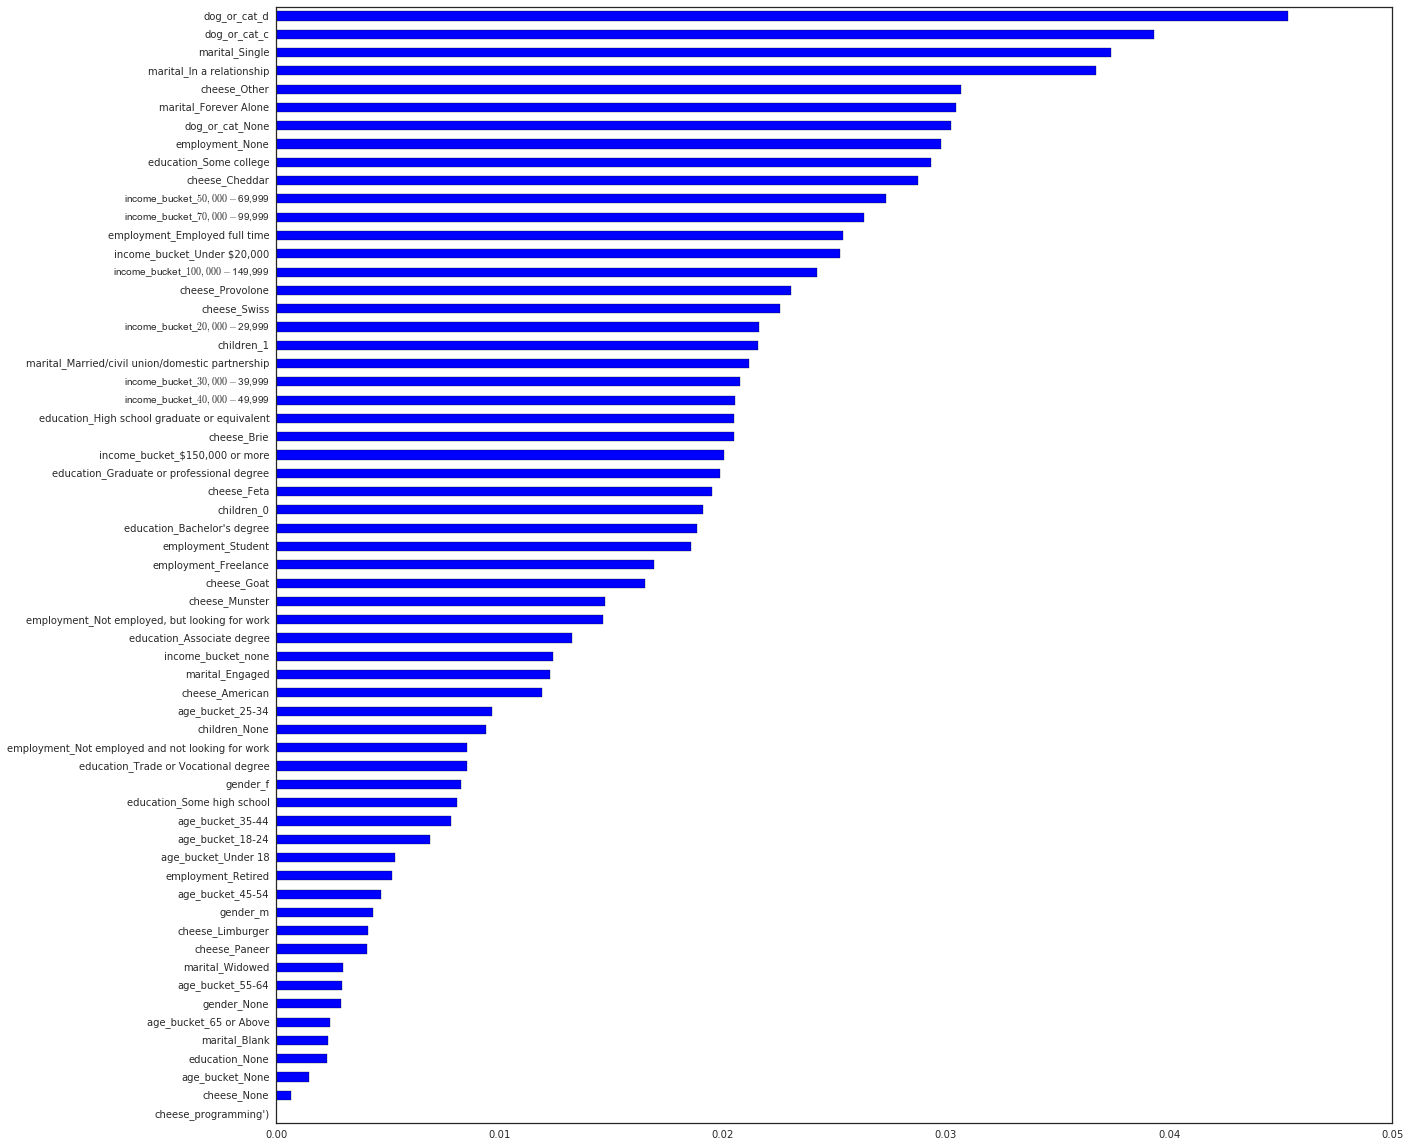

In [62]:
feature_importances = pd.Series(model.feature_importances_, index=X_for_forest.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(20,20));

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:39: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


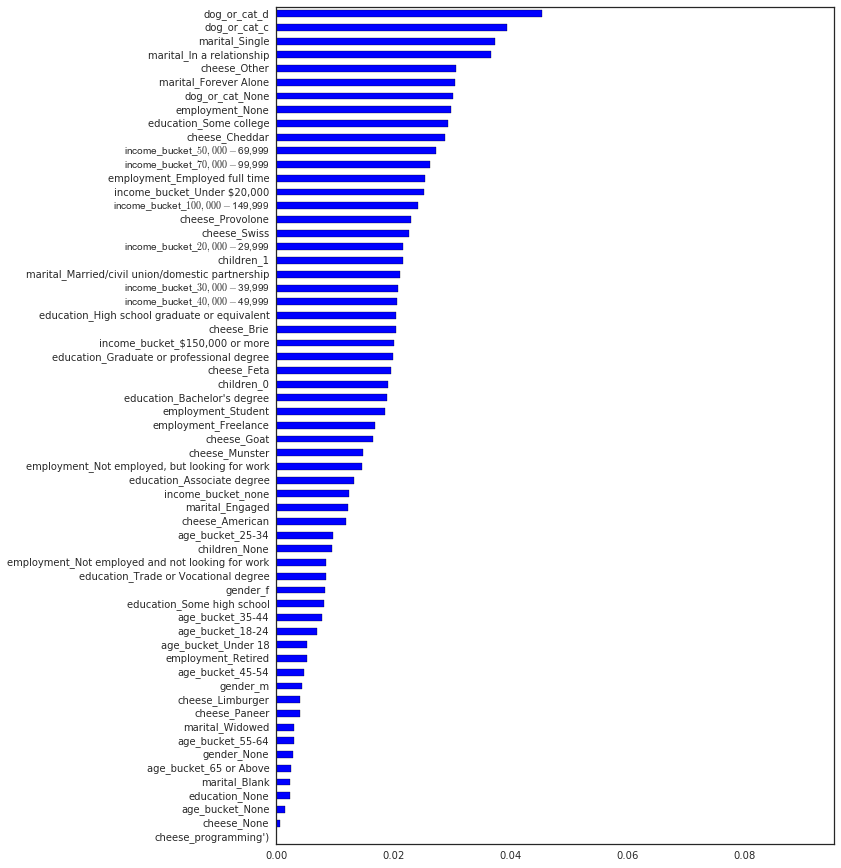

In [63]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X_for_forest.columns)


30 trees
C-stat:  0.594373629579

50 trees
C-stat:  0.605418574518

100 trees
C-stat:  0.614599522895

200 trees
C-stat:  0.62022871194

500 trees
C-stat:  0.623669637773

1000 trees
C-stat:  0.626356989909

2000 trees
C-stat:  0.627331973297



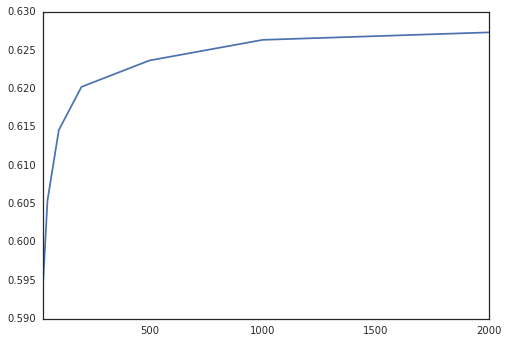

In [68]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=47)
    model.fit(X_for_forest, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.626956546505

None option
C-stat:  0.626956546505

sqrt option
C-stat:  0.62481113607

log2 option
C-stat:  0.62311362501

0.9 option
C-stat:  0.62602698162

0.2 option
C-stat:  0.62689785827



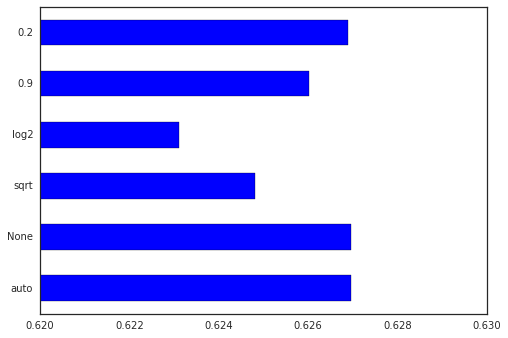

In [69]:
results2 = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=43, max_features=max_features)
    model.fit(X_for_forest, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results2.append(roc)
    print ""
    
pd.Series(results2, max_features_options).plot(kind="barh", xlim=(.62,.63));

1 min samples
C-stat:  0.626356989909

2 min samples
C-stat:  0.636349163635

3 min samples
C-stat:  0.643823389333

4 min samples
C-stat:  0.650490286057

5 min samples
C-stat:  0.656230654129

6 min samples
C-stat:  0.660044477786

7 min samples
C-stat:  0.662688433123

8 min samples
C-stat:  0.664763716153

9 min samples
C-stat:  0.666556923662

10 min samples
C-stat:  0.66827841581



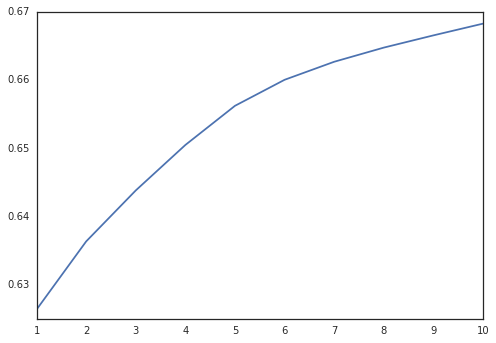

In [70]:
results3 = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=47, max_features="auto",  min_samples_leaf=min_samples)
    model.fit(X_for_forest, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results3.append(roc)
    print ""
    
pd.Series(results3, min_samples_leaf_options).plot();

In [67]:
model = RandomForestRegressor(n_estimators=500, oob_score=True, n_jobs=-1, random_state=47, max_features="auto", min_samples_leaf=10)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  1.0
